## sbs24018 - Machine Learning - CA1

##### For my project, I have chosen the area of "Education" and will use the "Student Performance Dataset" dataset found at https://www.kaggle.com/datasets/devansodariya/student-performance-data



In [1]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Load the dataset
stu_data = pd.read_csv('student_data.csv')

In [4]:
# Display the first 10 rows of the dataset.
stu_data.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

In [5]:
# Display dataset info.
stu_data.info()

      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# Describe dataset column data.
stu_data.describe()



age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [7]:
# Checking null values for all columns.
null_values = stu_data.isnull().sum()
null_values


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
# Identify the numeric and categorical columns in the dataset:
numeric_cols = stu_data.select_dtypes(include=[np.number]) 
#print(numeric_cols)

# Identify all categorical columns in the stu_data
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)

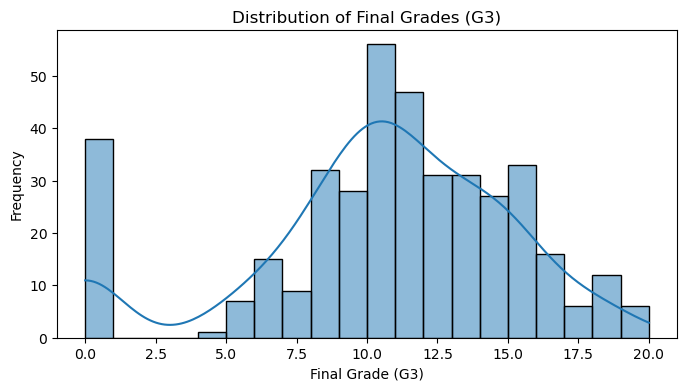

In [9]:
# Visualize the distribution of G3 final exam grades
plt.figure(figsize=(8, 4))
sns.histplot(numeric_cols['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

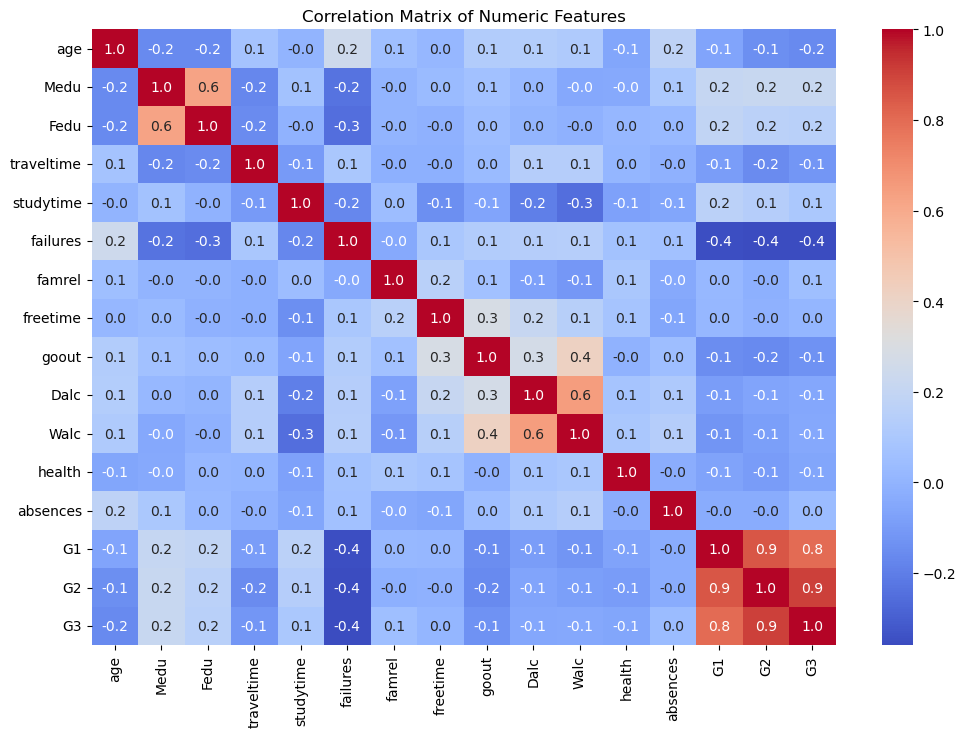

In [10]:
# Calculate and plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

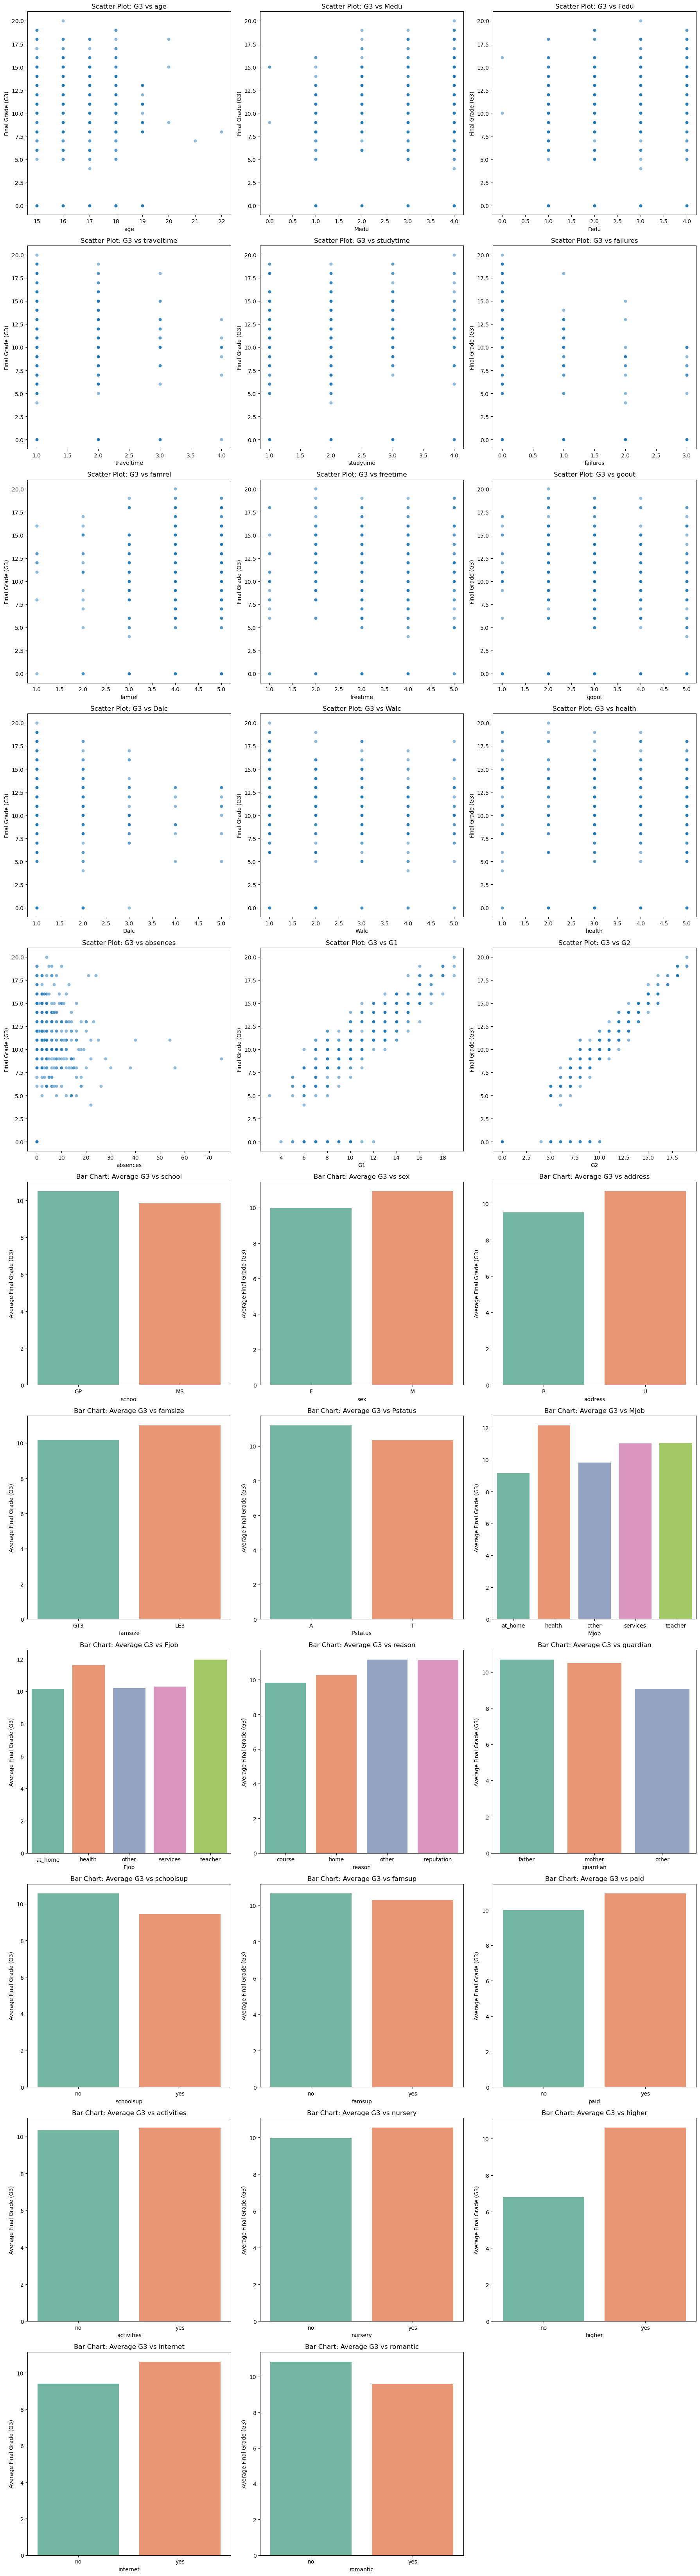

In [11]:
# Identify numeric and categorical columns, excluding 'G3' from numeric if present
numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist()
if 'G3' in numeric_cols:
    numeric_cols.remove('G3')
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()

# Setting the plotting area and dimensions
num_plots = len(numeric_cols) + len(categorical_cols)
total_rows = num_plots // 3 + (num_plots % 3 > 0)

fig, axes = plt.subplots(nrows=total_rows, ncols=3, figsize=(18, 6 * total_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plotting numeric features with scatter plots
for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=stu_data[col], y=stu_data['G3'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot: G3 vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Final Grade (G3)')

# Plotting categorical features with bar charts
for j, col in enumerate(categorical_cols):
    # Calculate the mean of G3 for each category and plot
    category_means = stu_data.groupby(col)['G3'].mean().reset_index()
    sns.barplot(x=col, y='G3', data=category_means, ax=axes[len(numeric_cols) + j], palette='Set2')
    axes[len(numeric_cols) + j].set_title(f'Bar Chart: Average G3 vs {col}')
    axes[len(numeric_cols) + j].set_xlabel(col)
    axes[len(numeric_cols) + j].set_ylabel('Average Final Grade (G3)')


# Adjust layout and remove unused subplots if any
for ax in axes[len(numeric_cols) + len(categorical_cols):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [12]:
# Encoding Categorical variables into numerical variables using One hot encoding
one_hot_encoded_data = pd.get_dummies(stu_data, columns=categorical_cols, drop_first=True) # Drop first because I was getting duplicate colums with inverted data
one_hot_encoded_data = one_hot_encoded_data * 1  # This converts True to 1 and False to 0


# first few rows to check the result
print(one_hot_encoded_data.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [13]:
# Display the first 10 rows of the dataset.
one_hot_encoded_data.head(10)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   
5   16     4     3           1          2         0       5         4      2   
6   16     2     2           1          2         0       4         4      4   
7   17     4     4           2          2         0       4         1      4   
8   15     3     2           1          2         0       4         2      2   
9   15     3     4           1          2         0       5         5      1   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   
5     1  ...                1               0              0           1   
6     1  ...                1               0              0           0   
7     1  ...                1               0              1           1   
8     1  ...                1               0              0           1   
9     1  ...                1               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet_yes  \
0         0               0            1           1             0   
1         0               0            0           1             1   
2         1               0            1           1             1   
3         1               1            1           1             1   
4         1               0            1           1             0   
5         1               1            1           1             1   
6         0               0            1           1             1   
7         0               0            1           1             0   
8         1               0            1           1             1   
9         1               1            1           1             1   

   romantic_yes  
0             0  
1             0  
2             0  
3             1  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  

[10 rows x 42 columns]

In [14]:
numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols)
numeric_cols_v2 = one_hot_encoded_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols, "\n")

categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)
categorical_cols_v2 = one_hot_encoded_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols, "\n")


all_cols_v2 = one_hot_encoded_data.columns.tolist()
print(all_cols_v2)


['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


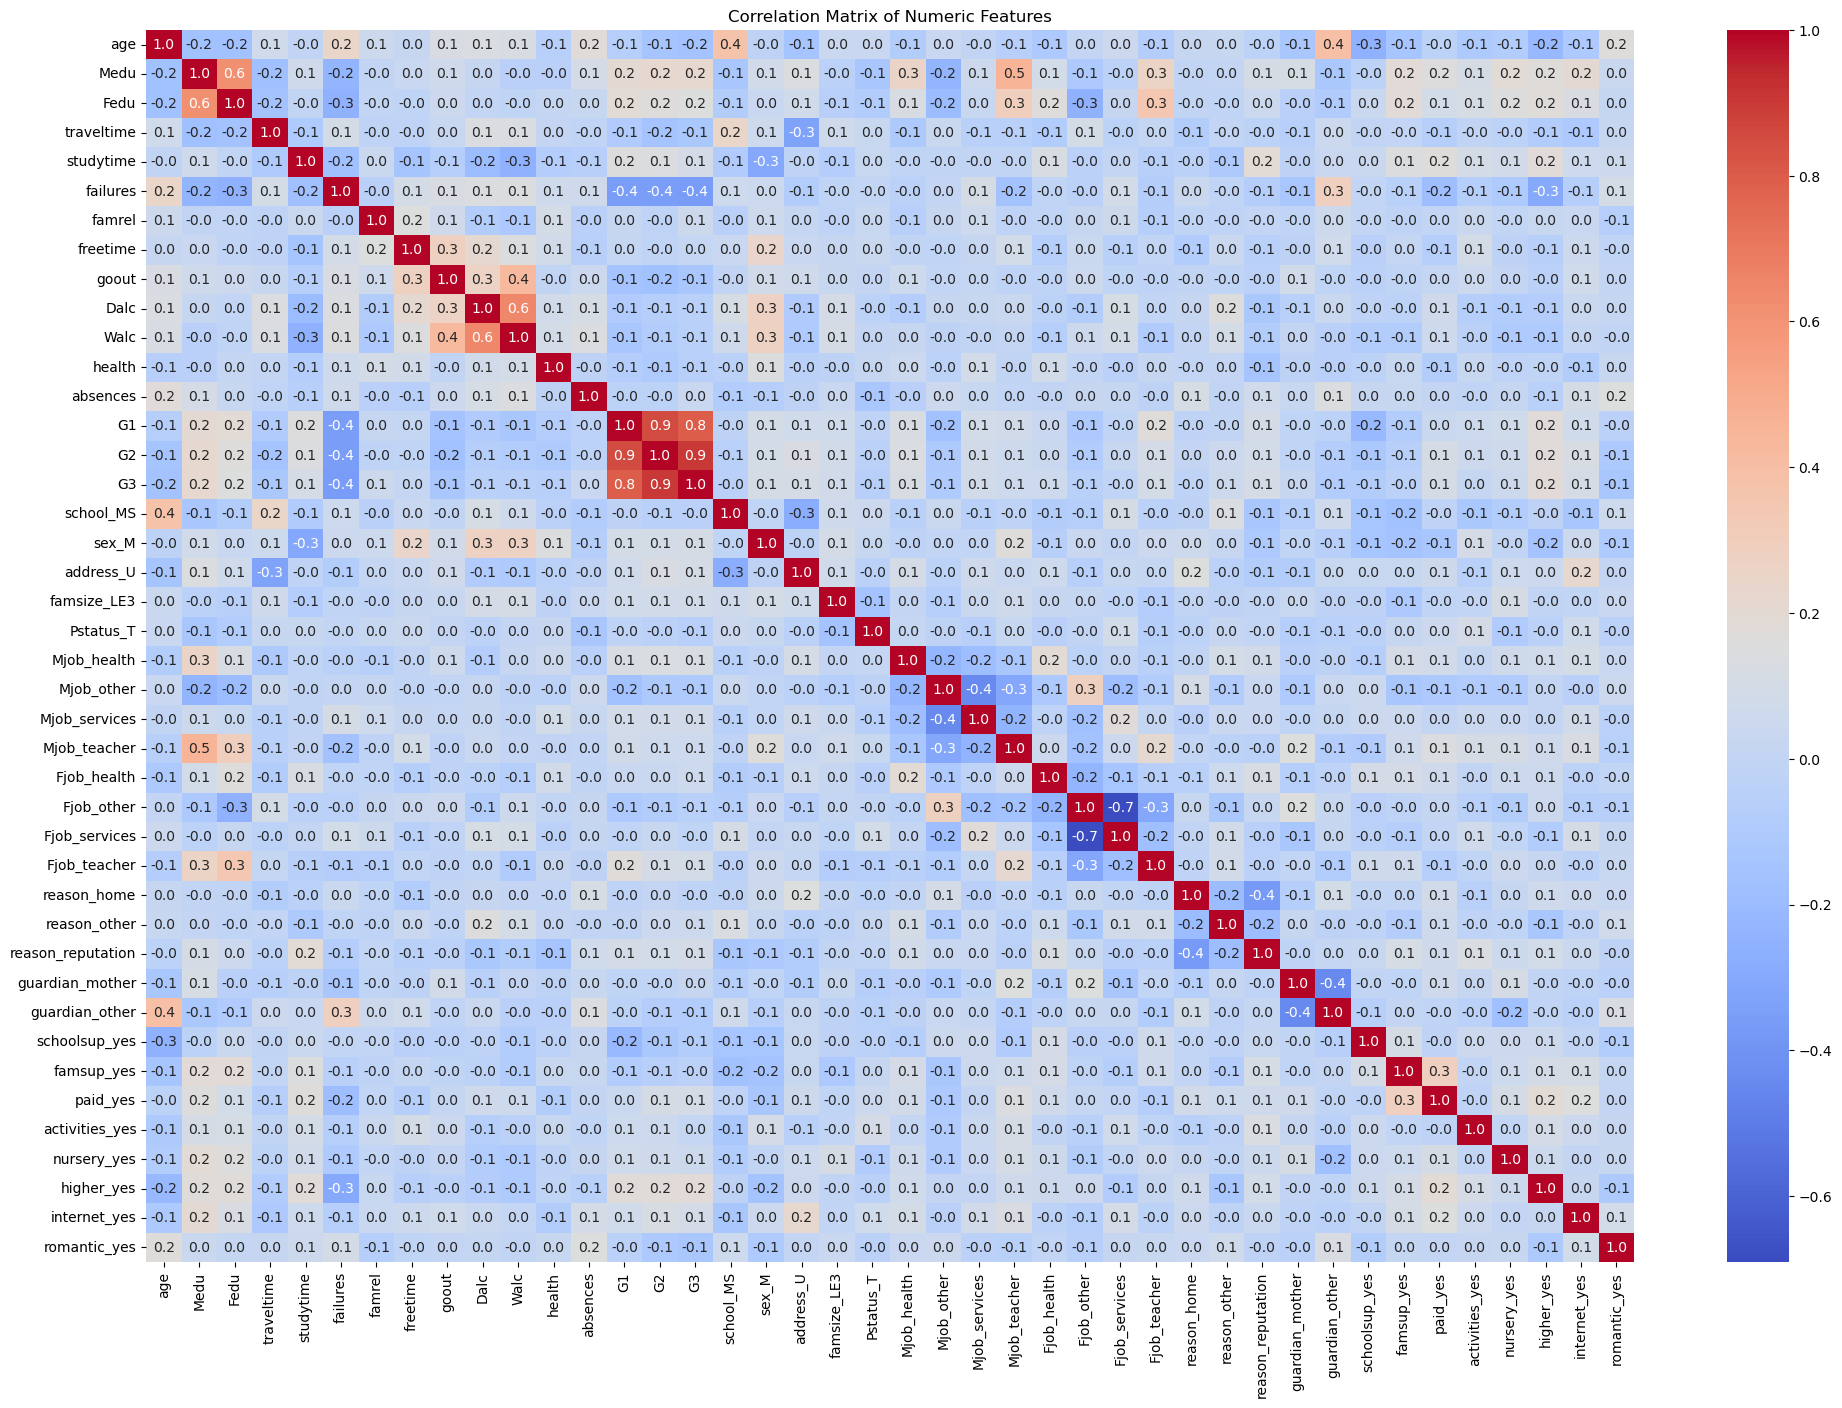

In [15]:
# Calculate and plot the correlation matrix again
plt.figure(figsize=(24, 16))
correlation_matrix = one_hot_encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [16]:
# Split the dataset into X and y columns
X = one_hot_encoded_data.drop('G3', axis=1)  # Independent variables
y = one_hot_encoded_data['G3']  # Dependent variable G3 

# Split the data into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (395, 41)
y: (395,)
X_train shape: (296, 41)
X_test shape: (99, 41)
y_train shape: (296,)
y_test shape: (99,)


In [17]:
# Method to calculate the cross validation score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [18]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.7814768535960913
STD:  0.07806959169411934




In [19]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-1.7289663104255464
[-0.12991401  0.00779842 -0.14617061  0.10478782 -0.1009103  -0.13572965
  0.38349255 -0.03941348  0.18135899 -0.24577886  0.04831897  0.0258263
  0.05276522  0.21334173  0.95373486  0.29692013  0.36688037  0.0236334
 -0.08040544 -0.28529384 -0.35806234 -0.13417489 -0.03812406  0.1632791
  0.47376466  0.16345192 -0.11416427 -0.04475325 -0.5580363   0.43283732
 -0.1063799   0.23138453 -0.3145062   0.74578129  0.22612034  0.12000141
 -0.55055969 -0.29078102  0.63888937 -0.16139569 -0.27184515]


In [20]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
y_pred

array([ 6.25083253, 11.83038939,  3.22885433,  9.25756481,  8.7537037 ,
       11.65524566, 18.77414713,  7.15527336,  7.44368684, 12.24559936,
       14.58035661,  5.5699005 , 13.31602777, 11.94371945, 14.64174491,
        8.67680095,  6.09426038, 10.89132007, 13.96446611,  8.09349145,
       13.82710575, 16.35526572, 13.74922118,  5.81789596,  8.04178987,
       20.51960917, 10.74151414,  9.28279971, 16.93978472, 11.08417146,
        9.5589892 ,  6.98634908, 14.63353439, 13.10212711,  5.41313008,
        4.29287071, -2.20240131, 15.43264764, 12.13716351,  7.02916855,
        5.98519352, 10.02659553, 14.51997591,  7.15665628, 17.02899266,
        9.43786772, 11.46660572, 13.59666074, 10.59829511, 15.90188437,
       14.20081173, 14.69621837,  9.92051565,  7.56282074,  3.67557167,
       12.52954999, 10.56965353,  6.73009655, 15.21156289, 16.13212696,
       13.30337338,  7.77373449,  8.73556384,  3.95715071,  3.42072892,
       16.43173533,  8.08520003,  8.82900232,  9.04189945, 16.08

In [21]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

Actual  Predicted
78       10   6.250833
371      12  11.830389
248       5   3.228854
55       10   9.257565
390       9   8.753704

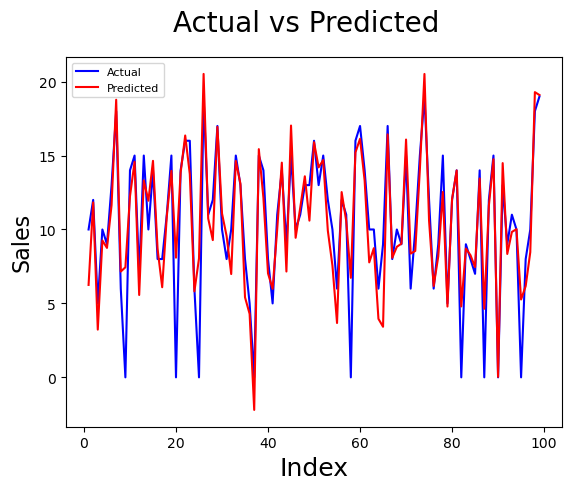

In [22]:
# Ploat actual v prediced values.

c = [i for i in range(1, 100)]  # Generating index adjusted to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('Sales', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

In [23]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.483800525651309
Mean Squared Error: 5.042664379229086
Root Mean Squared Error: 2.245587758077846
R-squared: 0.781113964140658


##### Training split = 20%
- Mean Absolute Error: 1.6466656197147507
- Mean Squared Error: 5.656642833231222
- Root Mean Squared Error: 2.3783697847961367
- R-squared: 0.7241341236974022

##### Training split = 25%
- Mean Absolute Error: 1.483800525651309
- Mean Squared Error: 5.042664379229086
- Root Mean Squared Error: 2.245587758077846
- R-squared: 0.781113964140658

##### Training split = 30%
- Mean Absolute Error: 1.525057339388754
- Mean Squared Error: 4.993008659924369
- Root Mean Squared Error: 2.234504119469098
- R-squared: 0.7728598737079843


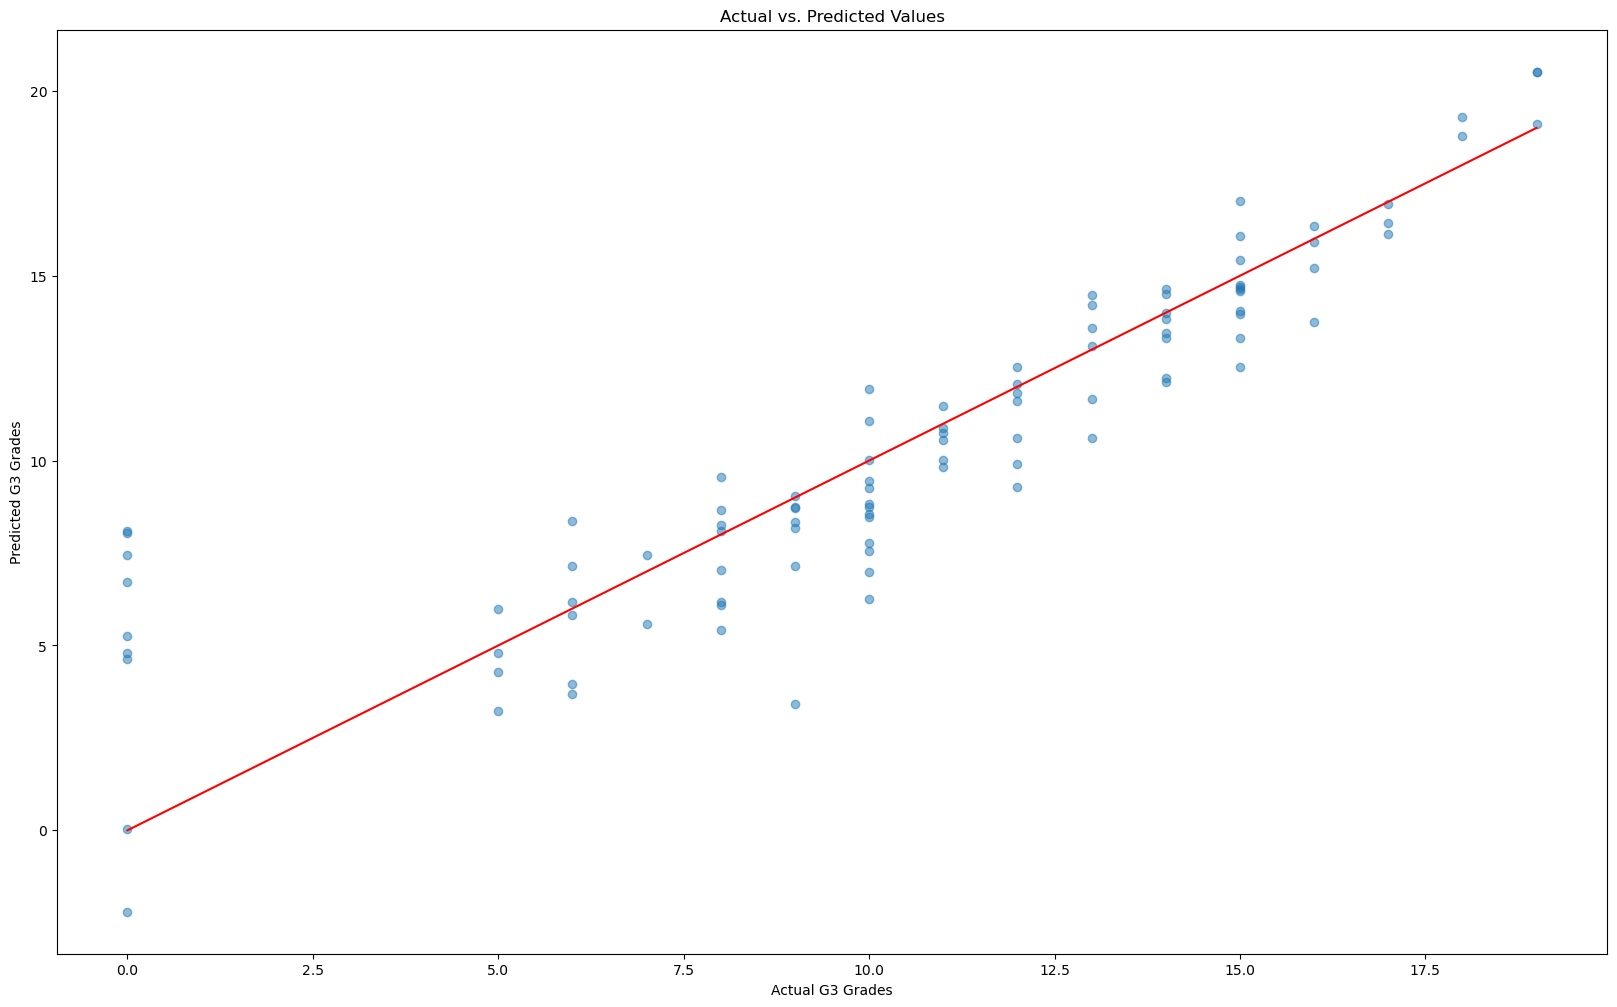

In [24]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(20, 12))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line where actual = predicted
plt.show()



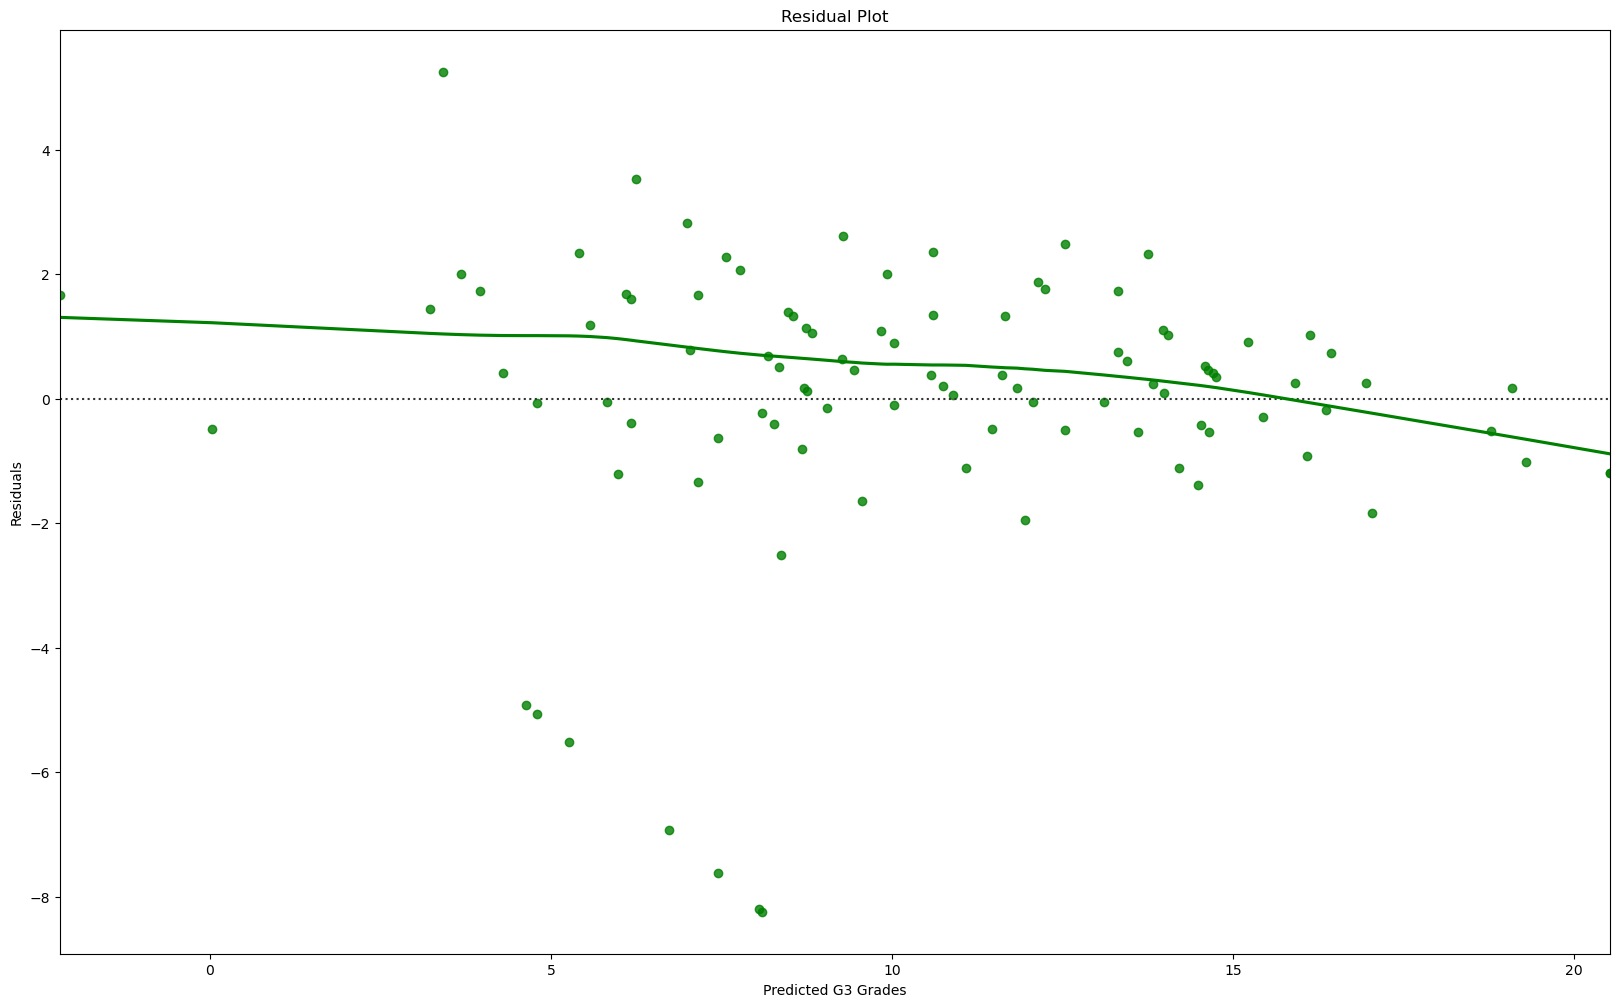

In [25]:
# Residual plot
plt.figure(figsize=(20, 12))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted G3 Grades')
plt.ylabel('Residuals')
plt.show()

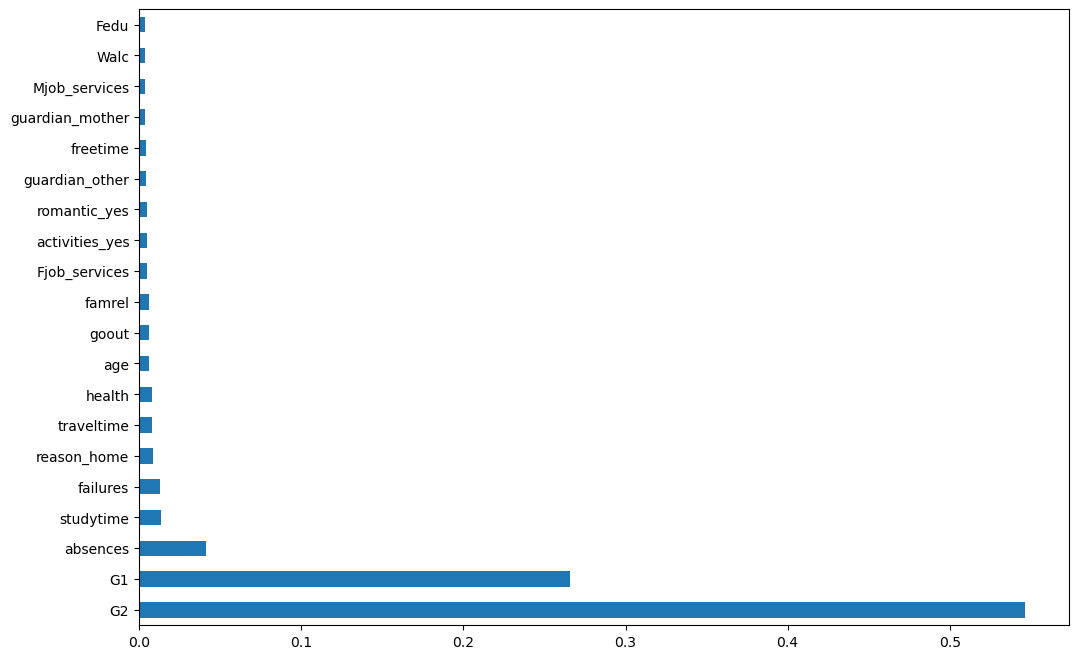

In [26]:
# Get the important features using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#print(selection.feature_importances_)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

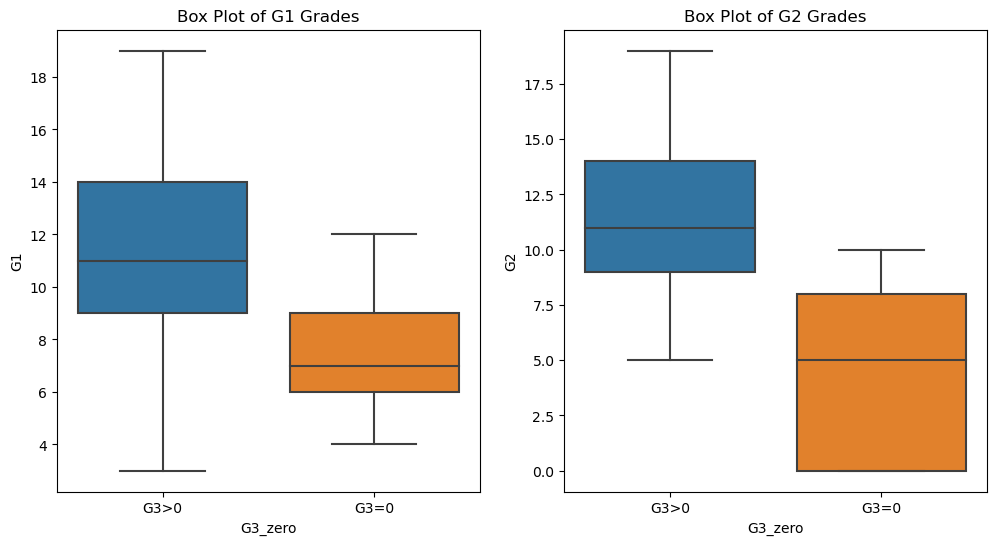

In [27]:
# Create a new column for plotting purposes
stu_data['G3_zero'] = stu_data['G3'].apply(lambda x: 'G3=0' if x == 0 else 'G3>0')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='G3_zero', y='G1', data=stu_data)
plt.title('Box Plot of G1 Grades')

plt.subplot(1, 2, 2)
sns.boxplot(x='G3_zero', y='G2', data=stu_data)
plt.title('Box Plot of G2 Grades')
plt.show()

### Removing the students who did not sit the exam

In [28]:
# I am going to remove the 38 cases where G3 is zero because I am making the assumption that these students did not sit the exam
stu_data_who_sat_exam = one_hot_encoded_data[one_hot_encoded_data['G3'] > 0]


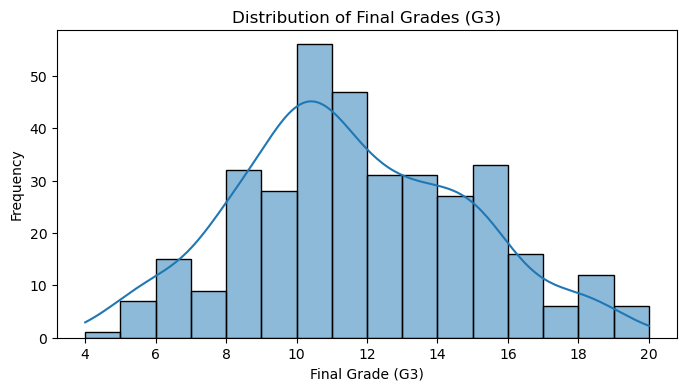

In [29]:
# Visualize the distribution of G3 after I exclude the students who did not sit the exam
plt.figure(figsize=(8, 4))
sns.histplot(stu_data_who_sat_exam['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Split the dataset into X and y columns
X = stu_data_who_sat_exam.drop('G3', axis=1)  # Independent variables
y = stu_data_who_sat_exam['G3']  # Dependent variable G3 

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (357, 41)
y: (357,)
X_train shape: (249, 41)
X_test shape: (108, 41)
y_train shape: (249,)
y_test shape: (108,)


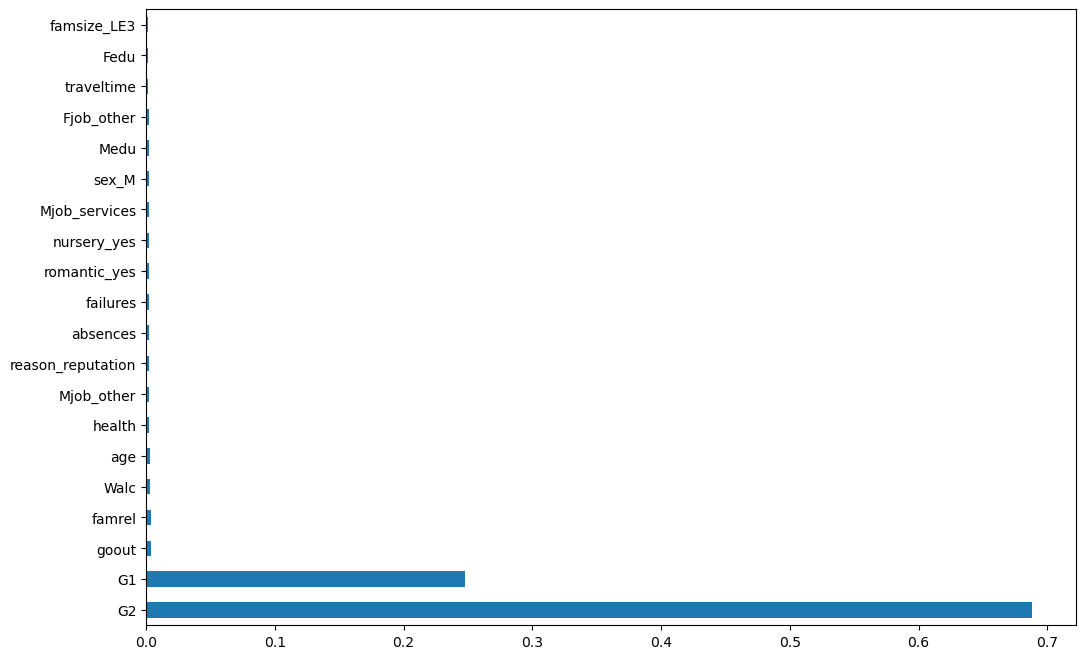

In [31]:
# Get the important features using ExtraTreesRegressor
sat_exam_selection = ExtraTreesRegressor()
sat_exam_selection.fit(X, y)

#print(sat_exam_selection.feature_importances_)

plt.figure(figsize = (12,8))
sat_exam_feat_importances = pd.Series(sat_exam_selection.feature_importances_, index=X.columns)
sat_exam_feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, X, y):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate and print performance metrics
    print("Model Performance:")
    print("Mean Absolute Error    : ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error     : ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-squared              : ", r2_score(y_test, y_pred))
    print("\n")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-validation R2 scores  : ", cv_scores)
    print("Mean CV R2                  : ", cv_scores.mean())
    print("Standard Deviation in CV R2 : ", cv_scores.std())
    
    return y_pred


In [33]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.show()

In [34]:
# Take the actual and predicted values as inputs and display a residual plot. 
# The residuals are calculated as the difference between the actual and the predicted values.


def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.title(f'Residual Plot - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.show()

In [35]:
# Training & evaluating the Linear Regression model
lr_sat_exam = LinearRegression()
y_pred_lr = evaluate_model(lr_sat_exam, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.7201225256673967
Mean Squared Error     :  0.8840190605458739
Root Mean Squared Error:  0.9402228781229873
R-squared              :  0.912569543462496


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294


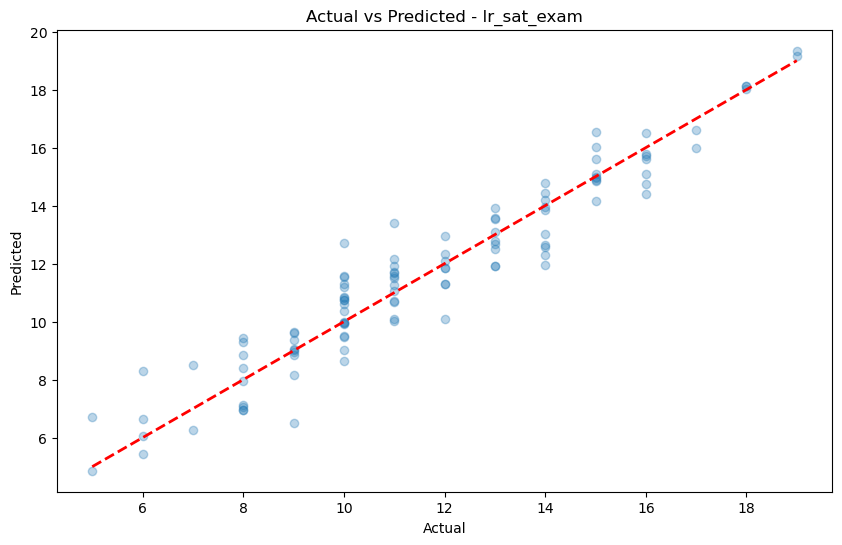

In [36]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_lr, 'lr_sat_exam')

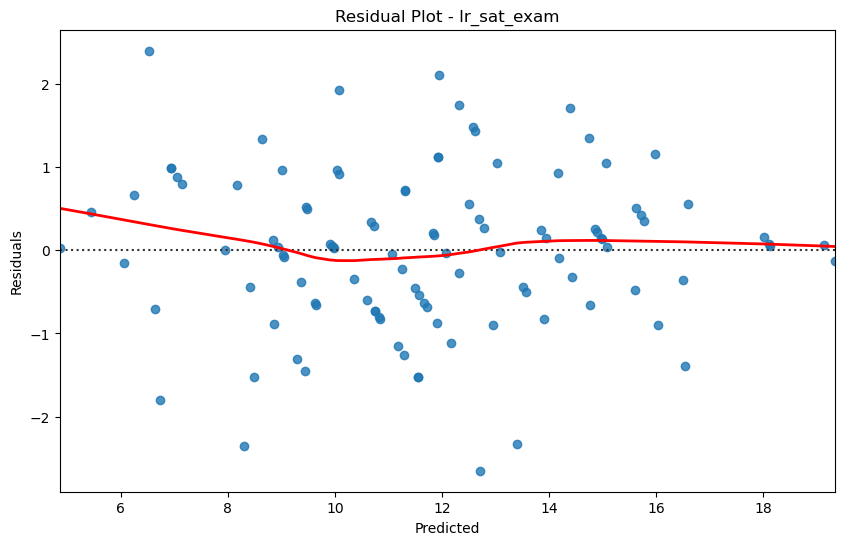

In [37]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_lr, 'lr_sat_exam')

In [38]:
# Linear Regression model

Split 20%

Model Performance:
Mean Absolute Error    :  0.6748214503583269
Mean Squared Error     :  0.8093960199604425
Root Mean Squared Error:  0.8996643929601985
R-squared              :  0.9159860447415067


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294

Split 25%

Model Performance:
Mean Absolute Error    :  0.719230638279496
Mean Squared Error     :  0.8832102513840957
Root Mean Squared Error:  0.93979266404037
R-squared              :  0.9084744506907121


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294

Split 30%

Model Performance:
Mean Absolute Error    :  0.7201225256673967
Mean Squared Error     :  0.8840190605458739
Root Mean Squared Error:  0.9402228781229873
R-squared              :  0.912569543462496


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294

SyntaxError: invalid syntax (55668145.py, line 3)

In [39]:
# Training & evaluating the SVM model
svm_model = svm.SVR(kernel = "linear")
y_pred_svm = evaluate_model(svm_model, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.7425673477768883
Mean Squared Error     :  0.9192415178144336
Root Mean Squared Error:  0.9587708369649307
R-squared              :  0.9090860037326384


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418


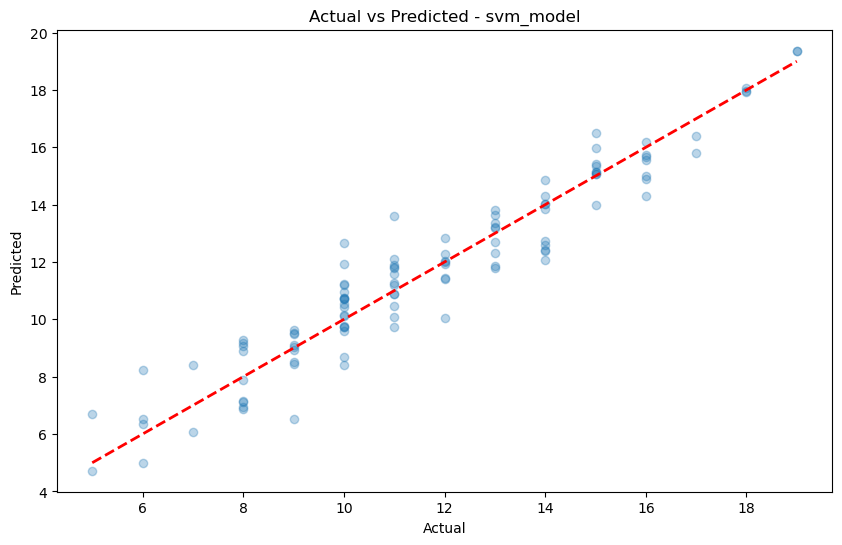

In [40]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_svm, 'svm_model')

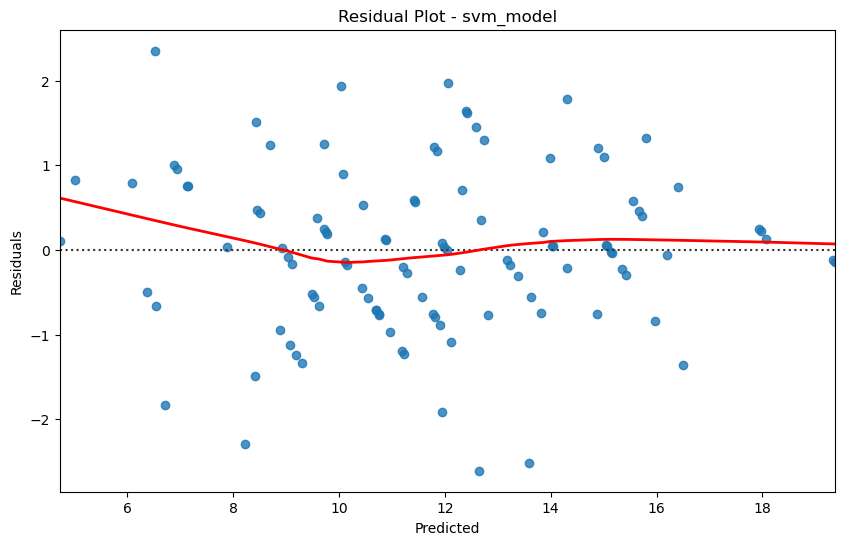

In [41]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_svm, 'svm_model')

In [42]:
# SVM model

Split 20%

Model Performance:
Mean Absolute Error    :  0.6789254583685616
Mean Squared Error     :  0.7957958165919297
Root Mean Squared Error:  0.8920738851641884
R-squared              :  0.9173977231401285


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418
    
Split 25%

Model Performance:
Mean Absolute Error    :  0.700780294415482
Mean Squared Error     :  0.8386780554950743
Root Mean Squared Error:  0.9157936751774792
R-squared              :  0.9130892450551391


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418

Split 30%

Model Performance:
Mean Absolute Error    :  0.7425673477768883
Mean Squared Error     :  0.9192415178144336
Root Mean Squared Error:  0.9587708369649307
R-squared              :  0.9090860037326384


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418

SyntaxError: invalid syntax (2664910199.py, line 3)

In [43]:
# Training & evaluating the Decision Tree model
dtr = DecisionTreeRegressor(criterion='squared_error', random_state=0)
y_pred_dtr = evaluate_model(dtr, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.7870370370370371
Mean Squared Error     :  1.0833333333333333
Root Mean Squared Error:  1.0408329997330663
R-squared              :  0.8928571428571428


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172


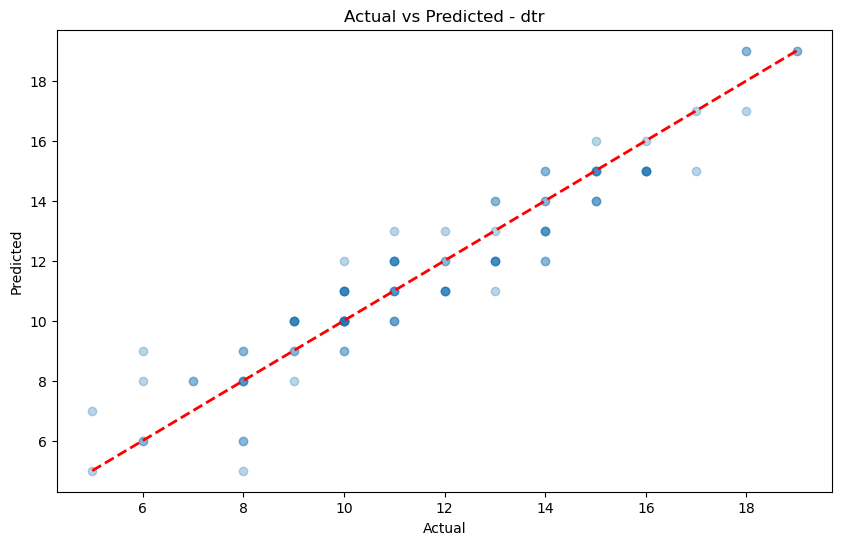

In [44]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_dtr, 'dtr')

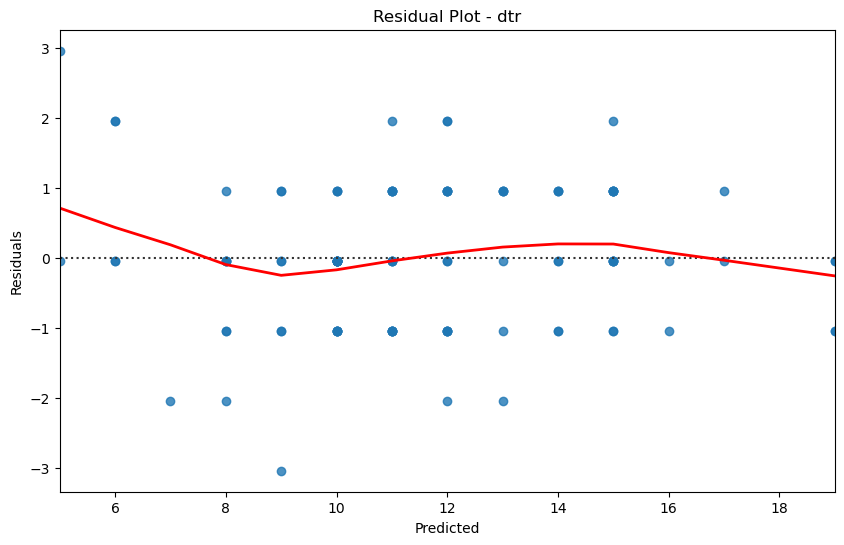

In [45]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_dtr, 'dtr')

In [46]:
# Decision Tree model

Split 20%

Model Performance:
Mean Absolute Error    :  0.7361111111111112
Mean Squared Error     :  1.0138888888888888
Root Mean Squared Error:  1.0069204977995476
R-squared              :  0.8947600264301303


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172

Split 25%

Model Performance:
Mean Absolute Error    :  0.8111111111111111
Mean Squared Error     :  1.2555555555555555
Root Mean Squared Error:  1.1205157542647741
R-squared              :  0.8698889514354434


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172
    
Split 30%

Model Performance:
Mean Absolute Error    :  0.7870370370370371
Mean Squared Error     :  1.0833333333333333
Root Mean Squared Error:  1.0408329997330663
R-squared              :  0.8928571428571428


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172

SyntaxError: invalid syntax (2670717365.py, line 3)

In [47]:
# Training & evaluating the random forest model
rfc = RandomForestRegressor ()
y_pred_rfc = evaluate_model(rfc, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.620462962962963
Mean Squared Error     :  0.6822157407407409
Root Mean Squared Error:  0.8259635226453653
R-squared              :  0.9325281135531135


Cross-validation R2 scores  :  [0.91282829 0.94573809 0.89876476 0.93653939 0.92022603]
Mean CV R2                  :  0.9228193120660976
Standard Deviation in CV R2 :  0.016725298787534995


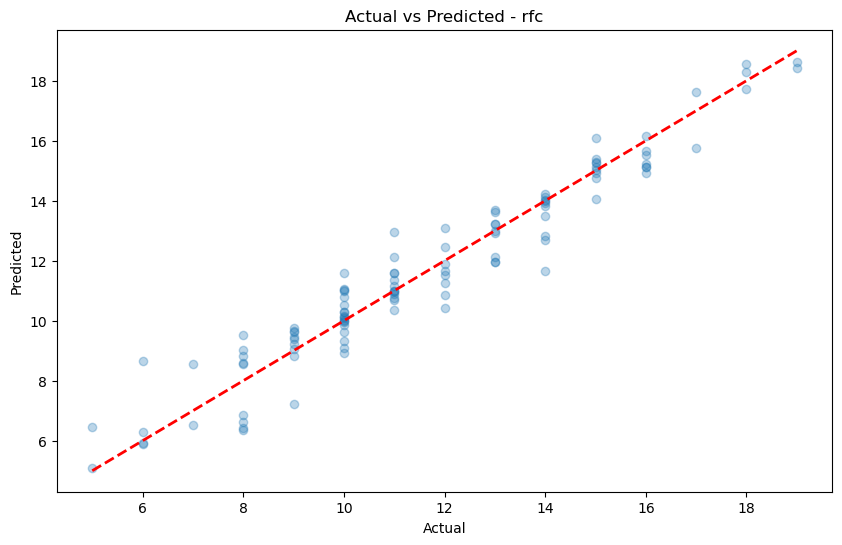

In [48]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_rfc, 'rfc')

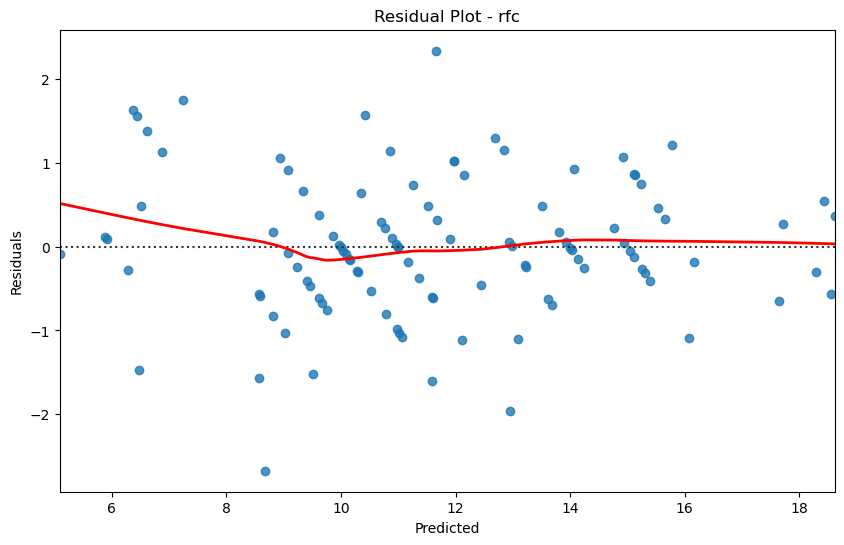

In [49]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_rfc, 'rfc')

In [65]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8019984585416406


In [66]:
# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score achieved: ", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score achieved:  0.8085539750907713


In [60]:
# Model with the best hyperparameters from GridSearchCV
rf_final = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_split=grid_search.best_params_['min_samples_split'],
                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                 max_features=grid_search.best_params_['max_features'],
                                 random_state=42)

rf_final.fit(X_train, y_train)
y_pred_final = rf_final.predict(X_test)

# Evaluation
print("Final Model Performance")
print("Mean Absolute Error    : ", mean_absolute_error(y_test, y_pred_final))
print("Mean Squared Error     : ", mean_squared_error(y_test, y_pred_final))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_final)))
print("R-squared              : ", r2_score(y_test, y_pred_final))

Final Model Performance
Mean Absolute Error    :  0.9513888888888888
Mean Squared Error     :  1.57600462962963
Root Mean Squared Error:  1.2553902300199846
R-squared              :  0.8441314102564101


In [ ]:
# random forest model

20%

Model Performance:
Mean Absolute Error    :  0.6111111111111112
Mean Squared Error     :  0.6888305555555557
Root Mean Squared Error:  0.8299581649430022
R-squared              :  0.9285005386140199


Cross-validation R2 scores  :  [0.91232561 0.94254654 0.89575837 0.93189747 0.91709329]
Mean CV R2                  :  0.9199242572677624
Standard Deviation in CV R2 :  0.016154686217516836

25%

Model Performance:
Mean Absolute Error    :  0.6388888888888888
Mean Squared Error     :  0.7531577777777778
Root Mean Squared Error:  0.8678466326360769
R-squared              :  0.921951563379561


Cross-validation R2 scores  :  [0.91339417 0.94391342 0.90000931 0.93431761 0.91579748]
Mean CV R2                  :  0.9214863986378441
Standard Deviation in CV R2 :  0.015663490484297497

30%

Model Performance:
Mean Absolute Error    :  0.6301851851851852
Mean Squared Error     :  0.7095888888888889
Root Mean Squared Error:  0.8423709924308226
R-squared              :  0.9298208791208791


Cross-validation R2 scores  :  [0.9137083  0.9413076  0.89519166 0.93093855 0.91358797]
Mean CV R2                  :  0.9189468161320731
Standard Deviation in CV R2 :  0.0159014017689962